<a href="https://colab.research.google.com/github/babupallam/Supervised-Learning-Classification-Algorithms/blob/main/02_Linear_Discriminant_Analysis_(LDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Discriminant Analysis (LDA)

  - LDA is a supervised classification algorithm primarily used for dimensionality reduction and pattern recognition in the context of classification problems.
  
  - It is particularly useful when dealing with datasets that have more than two classes and aims to find a linear combination of features that best separates the classes.

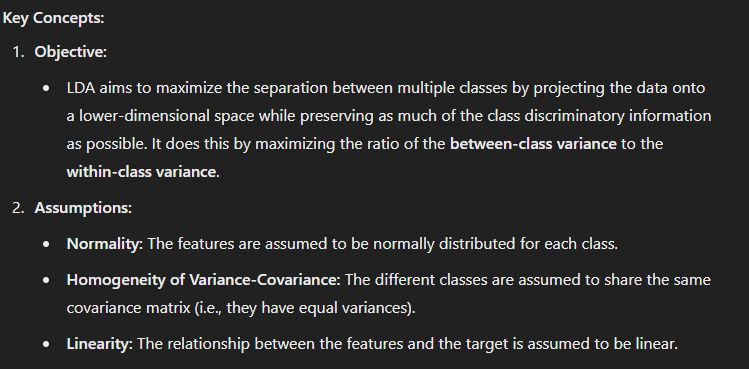


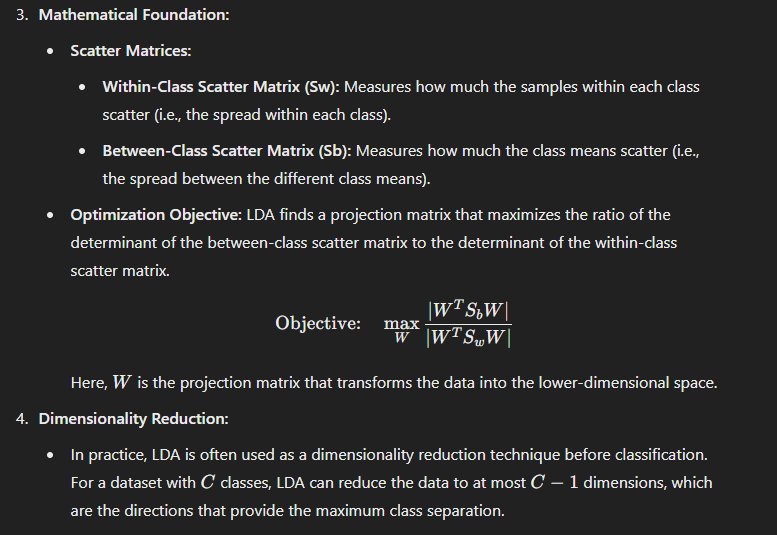


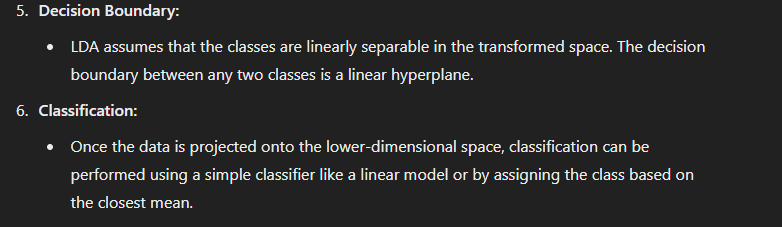



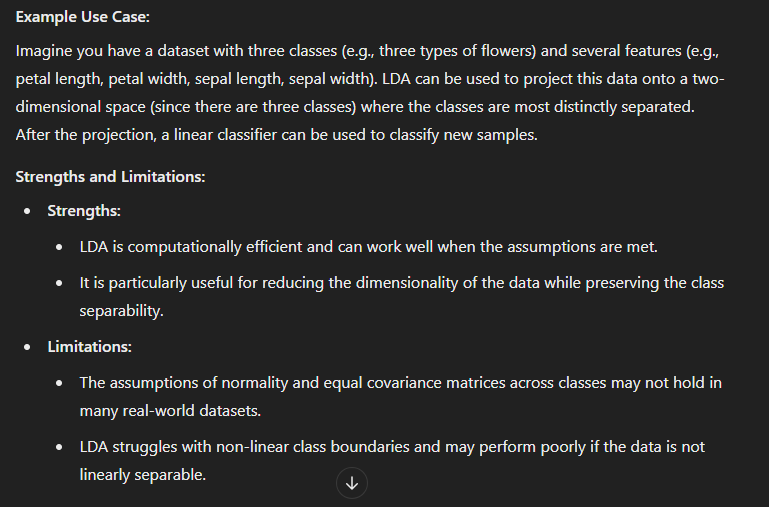

# Demo of the model

In [2]:
#import libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


In [3]:
# Load the Iris dataset
# We load the Iris dataset, which contains three classes of flowers: Setosa, Versicolor, and Virginica.

iris = load_iris()
X = iris.data
y = iris.target

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [5]:

# Standardize the features

#We split the dataset into training and testing sets. Then, we standardize the features to ensure they have a mean of 0 and a variance of 1, which is important for many machine learning algorithms.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [6]:
# Apply LDA

# We apply LDA to reduce the dimensionality of the dataset to 2 dimensions (n_components=2), which allows us to visualize the data. LDA finds the directions (LD1 and LD2) that maximize the separation between the classes.
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)


In [7]:

# Fit a classifier (using LDA-transformed data)

# We train a classifier using the LDA-transformed training data and evaluate its performance on the test data.
lda_classifier = LinearDiscriminantAnalysis()
lda_classifier.fit(X_train_lda, y_train)
y_pred = lda_classifier.predict(X_test_lda)


In [8]:

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=iris.target_names)


In [9]:
# Display the results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)


Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



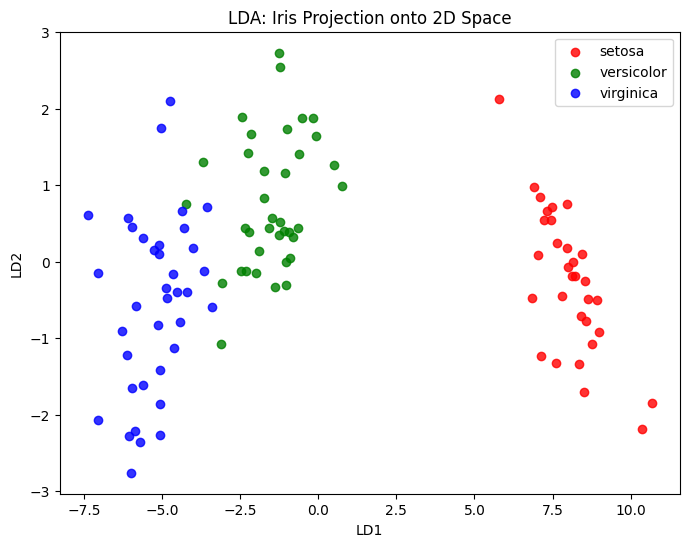

In [10]:

# Plot the LDA-transformed data
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']
for i, color in enumerate(colors):
    plt.scatter(X_train_lda[y_train == i, 0], X_train_lda[y_train == i, 1], alpha=0.8, color=color, label=iris.target_names[i])

plt.legend(loc='best')
plt.title('LDA: Iris Projection onto 2D Space')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.show()

# Applications of This Model

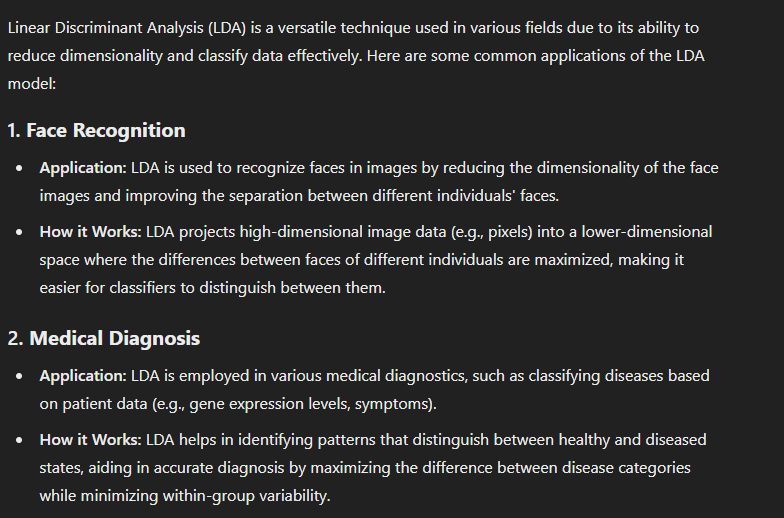

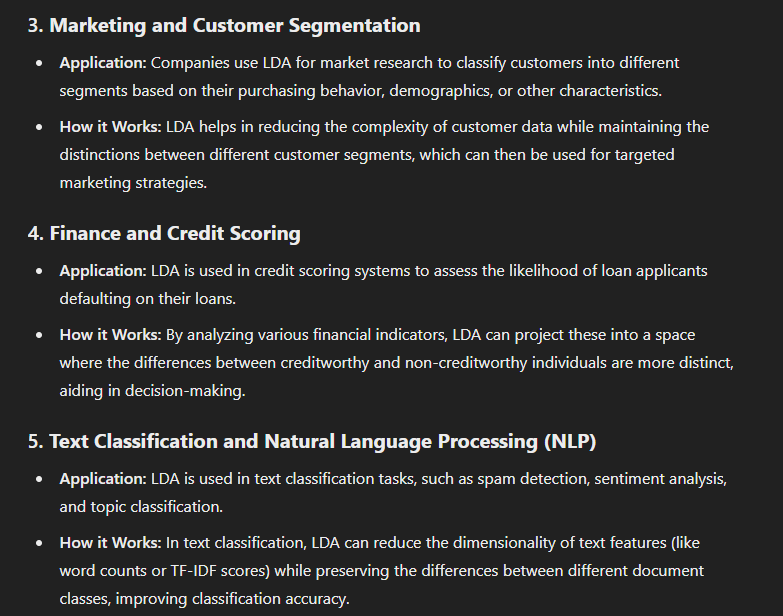


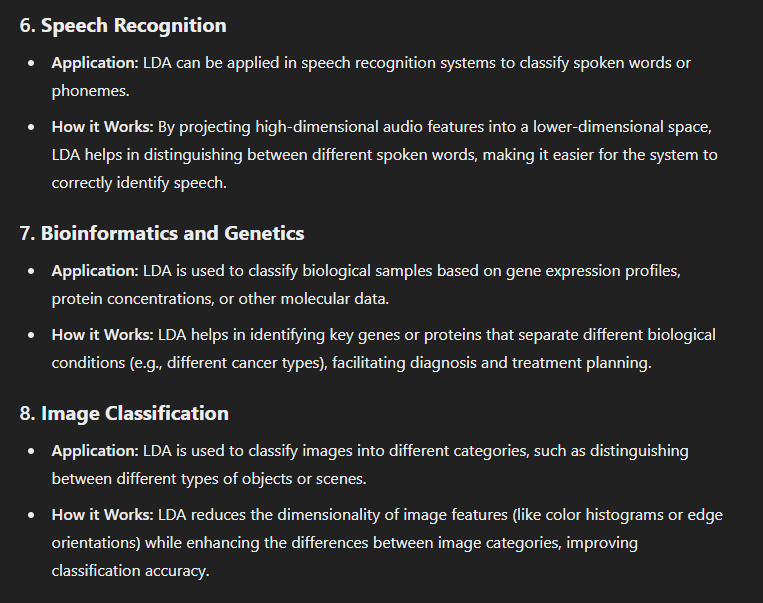


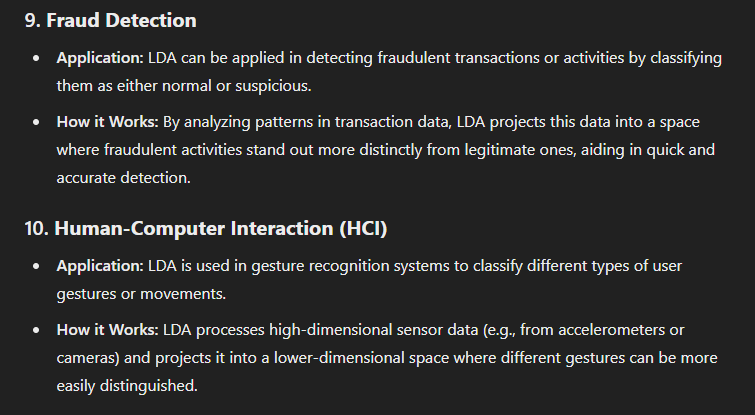

# Application 1: Linear Discriminant Analysis (LDA) for face recognition

To provide a demonstration of how Linear Discriminant Analysis (LDA) can be used for face recognition, we'll use the scikit-learn library along with the popular Labeled Faces in the Wild (LFW) dataset. This dataset contains labeled images of famous individuals, and we'll use LDA to classify the faces.

In [41]:
#import libraries

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


In [50]:
#Load and Prepare the Dataset


#We load the LFW dataset, which contains grayscale images of faces. We extract the feature matrix X and the corresponding labels y.

# Load the LFW dataset
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# Get the data and labels
X = lfw_people.data
y = lfw_people.target
target_names = lfw_people.target_names

#-----------------------

# The data is split into training and test sets, and then standardized to have a mean of 0 and variance of 1.


# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
# Apply LDA for Dimensionality Reduction

# We apply LDA to reduce the dimensionality of the data. Here, we set n_components to project the data into a lower-dimensional space where the separability between classes (different individuals) is maximized.

# Apply LDA
# Set n_components to be the smaller of (n_features, n_classes - 1)
n_components = min(X_train.shape[1], len(np.unique(y_train)) - 1)
lda = LinearDiscriminantAnalysis(n_components=n_components)

X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

In [48]:
# Train a Classifier

# We use a Support Vector Machine (SVM) with an RBF kernel to classify the LDA-transformed data. SVM is chosen because it is effective in high-dimensional spaces and robust to overfitting.


# Train a Support Vector Machine (SVM) classifier on the LDA-transformed data
svm = SVC(kernel='rbf', class_weight='balanced')
svm.fit(X_train_lda, y_train)


SVC(class_weight='balanced')

In [46]:
# Evaluate the Classifier
# Predict the labels for the test set
y_pred = svm.predict(X_test_lda)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))


Accuracy: 0.69

Classification Report:
                   precision    recall  f1-score   support

     Ariel Sharon       0.56      0.56      0.56        18
     Colin Powell       0.73      0.62      0.67        69
  Donald Rumsfeld       0.52      0.65      0.58        34
    George W Bush       0.83      0.77      0.80       166
Gerhard Schroeder       0.56      0.45      0.50        31
      Hugo Chavez       0.54      0.68      0.60        19
       Tony Blair       0.58      0.76      0.66        50

         accuracy                           0.69       387
        macro avg       0.62      0.64      0.62       387
     weighted avg       0.70      0.69      0.69       387



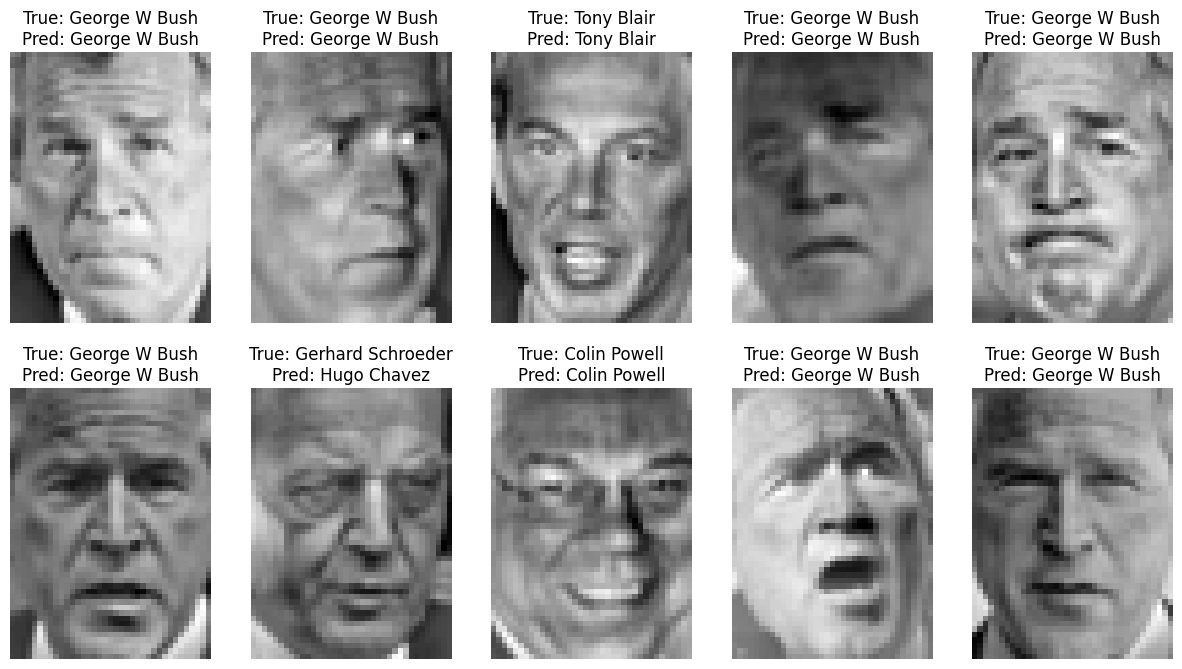

In [47]:
# Visualize the Results

# Visualize some of the test set results
fig, ax = plt.subplots(2, 5, figsize=(15, 8))

for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(50, 37), cmap='gray')
    axi.set_title(f"True: {target_names[y_test[i]]}\nPred: {target_names[y_pred[i]]}")
    axi.axis('off')

plt.show()


#Application 2: Linear Discriminant Analysis (LDA) for Image Classification

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler


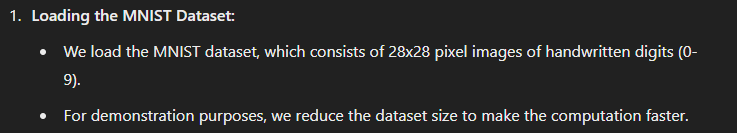

In [52]:

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


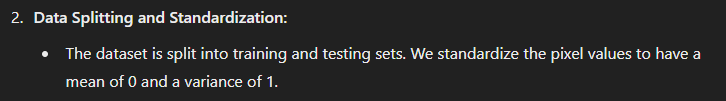

In [53]:

# Extract the data and labels
X, y = mnist.data, mnist.target
y = y.astype(int)

# For demonstration, we reduce the dataset size
X, _, y, _ = train_test_split(X, y, train_size=0.1, stratify=y, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [54]:

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


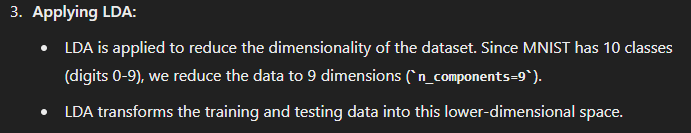

In [55]:

# Apply LDA
lda = LinearDiscriminantAnalysis(n_components=9)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)


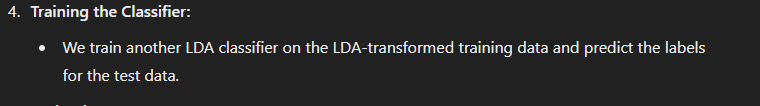

In [56]:

# Fit a classifier (using LDA-transformed data)
lda_classifier = LinearDiscriminantAnalysis()
lda_classifier.fit(X_train_lda, y_train)
y_pred = lda_classifier.predict(X_test_lda)


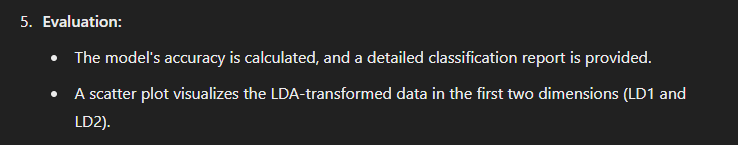

In [57]:

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=[str(i) for i in range(10)])


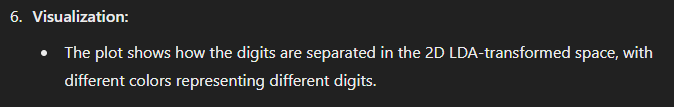

In [58]:

# Display the results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)


Accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       207
           1       0.86      0.95      0.90       236
           2       0.90      0.70      0.79       210
           3       0.84      0.77      0.80       214
           4       0.81      0.87      0.84       205
           5       0.82      0.77      0.79       189
           6       0.89      0.92      0.90       206
           7       0.86      0.78      0.82       219
           8       0.78      0.87      0.82       205
           9       0.74      0.80      0.77       209

    accuracy                           0.84      2100
   macro avg       0.84      0.84      0.84      2100
weighted avg       0.84      0.84      0.84      2100



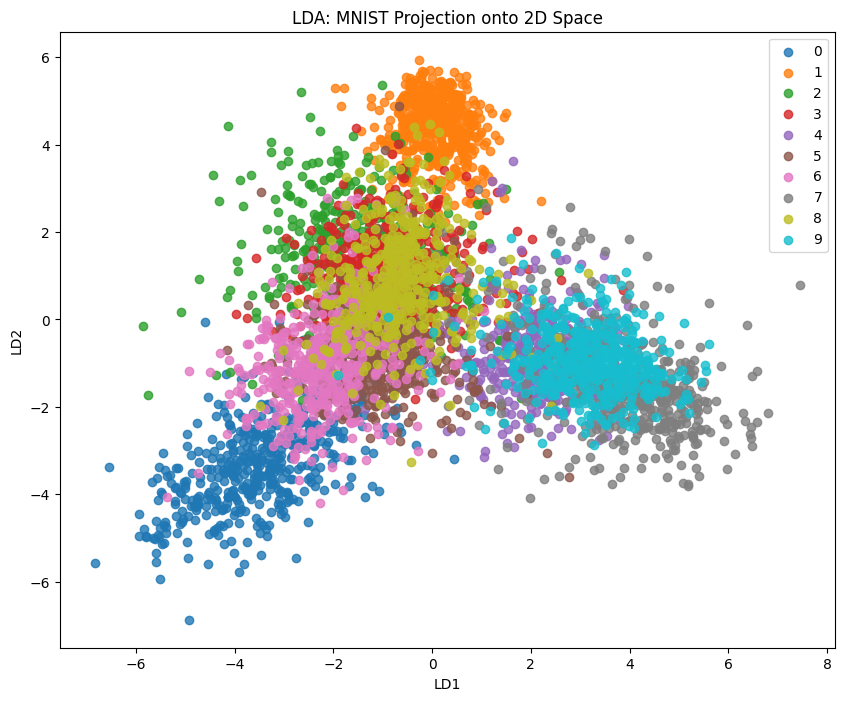

In [59]:

# Visualize the LDA-transformed data
plt.figure(figsize=(10, 8))
for i in range(10):
    plt.scatter(X_train_lda[y_train == i, 0], X_train_lda[y_train == i, 1], alpha=0.8, label=str(i))

plt.legend(loc='best')
plt.title('LDA: MNIST Projection onto 2D Space')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.show()


# Application 3: Linear Discriminant Analysis (LDA) for customer segmentation in marketing

In [65]:
# Create a Synthetic Customer Dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Create a synthetic customer dataset
np.random.seed(0)
n_samples = 300
n_features = 4
n_classes = 3

# Generate synthetic data
X, y = make_classification(n_samples=n_samples, n_features=n_features, n_classes=n_classes,
                           n_clusters_per_class=1, n_redundant=0, n_informative=4,
                           random_state=0, scale=1)

print(X)

[[-0.92251409  0.26582569  0.62499455 -0.03557441]
 [ 1.80912271  1.20833499  0.65295986  0.77076888]
 [ 0.30375568 -1.85847317 -0.04981161 -1.5567413 ]
 ...
 [ 1.80911656  2.06728256  0.83386822 -0.47997081]
 [ 0.16986709 -0.15997368 -3.21735805 -1.27917579]
 [-0.98296068 -1.82581894  0.61933873 -0.58183634]]


In [71]:

# Convert to a DataFrame for better visualization
data = pd.DataFrame(X, columns=['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4'])
data['Class'] = y

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

print(X_train)
print(y_train)


[[-1.57641810e-01 -1.08944953e+00 -8.42095676e-01  1.08404527e+00]
 [ 2.84780699e-01 -9.53311793e-01  3.49289184e-01 -7.43833810e-01]
 [-9.05378100e-01 -6.66385666e-02  1.44215705e+00 -6.93118129e-01]
 [ 1.00837732e+00  1.64425332e+00 -1.50540873e-01 -1.06499900e+00]
 [ 1.39421668e+00  1.92220730e+00  6.10089266e-01 -8.34955151e-01]
 [-1.07370222e+00 -5.86828220e-01 -9.25948536e-01  1.67414884e+00]
 [-1.39318318e-01 -1.95017193e-01  1.68240366e-01  1.04110267e-01]
 [-7.59973756e-01 -3.89172528e-01 -4.17835769e-01  9.28299484e-01]
 [ 5.70613531e-01  4.91157583e-01 -1.44810920e+00 -2.28942951e-01]
 [-2.03369372e+00  1.10252784e+00  1.96091956e+00  7.16532074e-01]
 [ 1.53257742e-01  4.05685421e-01  1.36493194e+00 -5.60752257e-02]
 [ 9.32504219e-01 -2.17013957e+00 -1.04275740e-01 -1.56860728e+00]
 [ 1.36616184e-01  1.79478720e-01  1.39019910e-01 -9.46414563e-02]
 [-6.55219412e-01 -6.04395534e-01  7.13389611e-01  1.14690867e-01]
 [-1.29716522e+00  8.85956593e-01  1.37670240e+00  5.32717356e

In [72]:
# Apply LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)


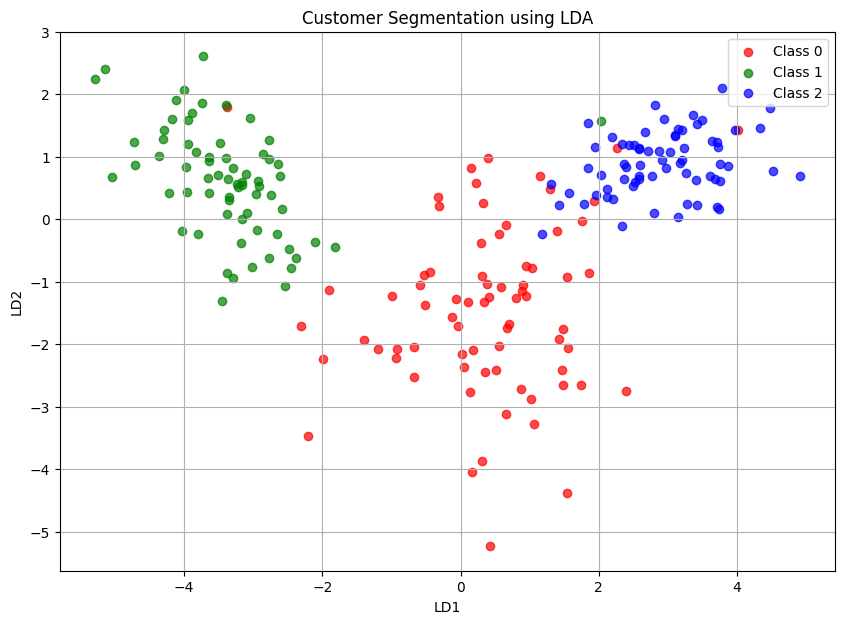

In [73]:
# Plot the LDA-transformed data
plt.figure(figsize=(10, 7))
colors = ['red', 'green', 'blue']
for i in range(n_classes):
    plt.scatter(X_train_lda[y_train == i, 0], X_train_lda[y_train == i, 1],
                color=colors[i], label=f'Class {i}', alpha=0.7)

plt.title('Customer Segmentation using LDA')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend(loc='best')
plt.grid(True)
plt.show()


# Application 4: Linear Discriminant Analysis (LDA) in Human-Computer Interaction (HCI)


We'll create a synthetic dataset representing gestures, apply LDA to reduce dimensionality, and then use a classifier (like a Support Vector Machine) to recognize the gestures.

In [81]:
#Import the Necessary Libraries
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

In [82]:
# Create a synthetic dataset with 3 gesture classes
X, y = make_classification(n_samples=300, n_features=20, n_informative=15, n_classes=3, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [83]:
# Apply LDA to reduce to 2 components for visualization purposes
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)


In [84]:
# Train a Support Vector Machine (SVM) on the LDA-transformed data

# The transformed data is plotted in 2D, showing how the gestures are separated in the LDA space. This visual representation helps to understand how LDA enhances the separation between different classes.


svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_lda, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test_lda)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Gesture 1', 'Gesture 2', 'Gesture 3'])

# Display the results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)


Accuracy: 0.71
Classification Report:
              precision    recall  f1-score   support

   Gesture 1       0.70      0.72      0.71        32
   Gesture 2       0.85      0.77      0.81        30
   Gesture 3       0.60      0.64      0.62        28

    accuracy                           0.71        90
   macro avg       0.72      0.71      0.71        90
weighted avg       0.72      0.71      0.71        90



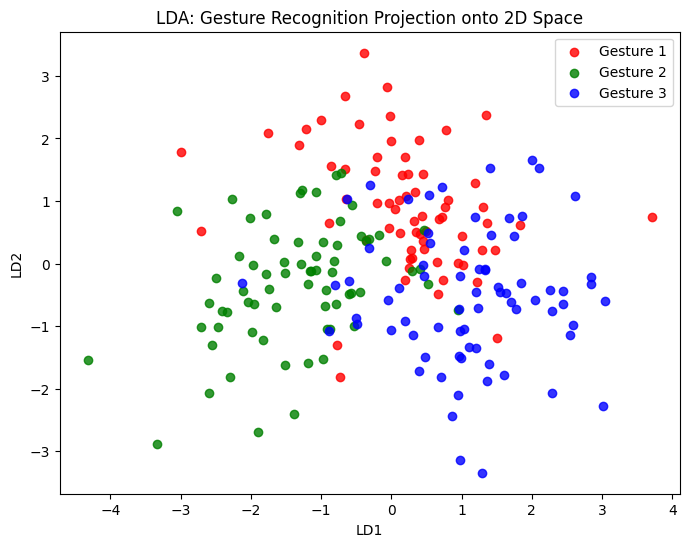

In [85]:
# Plot the LDA-transformed data
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']
for i, color in enumerate(colors):
    plt.scatter(X_train_lda[y_train == i, 0], X_train_lda[y_train == i, 1], alpha=0.8, color=color, label=f'Gesture {i+1}')

plt.legend(loc='best')
plt.title('LDA: Gesture Recognition Projection onto 2D Space')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.show()
